# Laboratorio 1
## Integrantes:
- José Antonio Mérida -- 
- Joaquín Puente -- 22296 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def plot_walk_forward(
    train, test, preds, 
    col=None, 
    title="Walk Forward Validation", 
    ylabel="Value"
):
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.metrics import mean_squared_error
    import numpy as np

    # Auto-detect column if not provided
    if col is None:
        col = train.columns[0] if hasattr(train, "columns") else None
        if col is None:
            raise ValueError("Column name must be provided if train/test are Series.")

    # Ensure preds is a Series with the same index as test
    preds_series = pd.Series(preds, index=test.index)

    plt.figure(figsize=(10, 5))

    # Plot training region in blue
    plt.plot(
        train.index, train[col],
        color='blue', linewidth=2, label='Observed (Train)', zorder=2
    )

    # Plot test region in green
    plt.plot(
        test.index, test[col],
        color='green', linewidth=2, label='Observed (Test)', zorder=3
    )

    # Plot predictions in red dashed
    plt.plot(
        preds_series.index, preds_series,
        color='red', linestyle='--', linewidth=2, label='Prediction', zorder=4
    )

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.legend()
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.show()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test[col], preds))
    print(f"RMSE: {rmse:.2f}")
    return rmse

## shampoo.csv

### Análisis exploratorio

/tmp/ipykernel_3184/1022166198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv(f'datasets/{filename}',


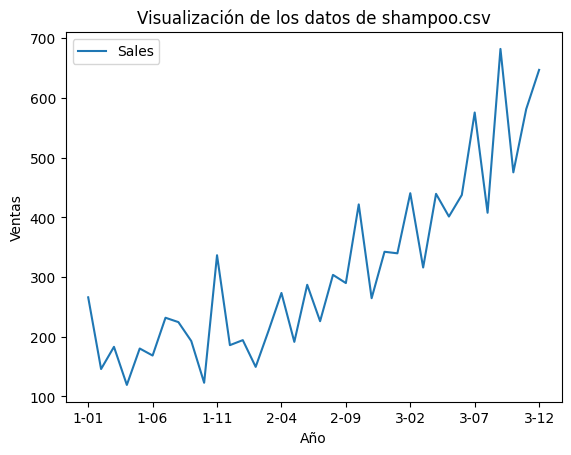

In [7]:
# Leer los datos
filename = 'shampoo.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

Desc

In [8]:
# Split: 29 for train, 7 for test
train_size = 29
train = datos.iloc[:train_size]
test = datos.iloc[train_size:]

### Promedios móviles

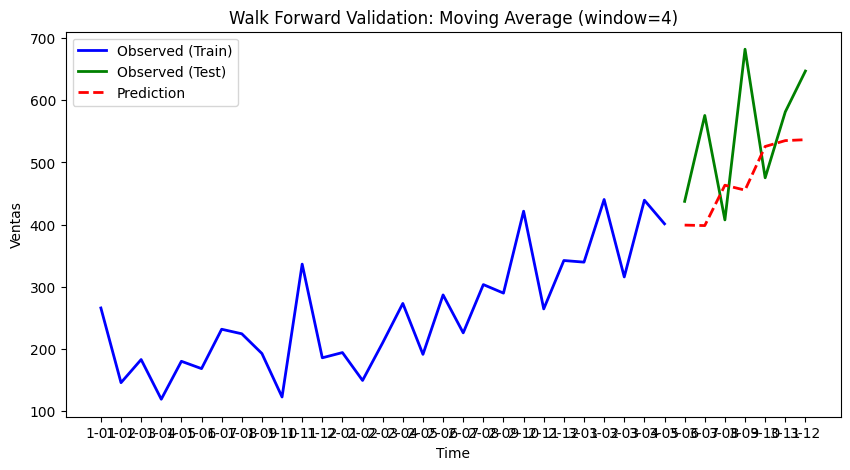

RMSE: 121.93


np.float64(121.93388284523003)

In [9]:
import numpy as np

window = 4
history = list(train['Sales'])
preds = []

for t in range(len(test)):
    if len(history) >= window:
        pred = np.mean(history[-window:])
    else:
        pred = np.mean(history)
    preds.append(pred)
    history.append(test['Sales'].iloc[t])

# Use the reusable plotting method
plot_walk_forward(
    train, test, preds, col='Sales',
    title="Walk Forward Validation: Moving Average (window=4)",
    ylabel="Ventas"
)

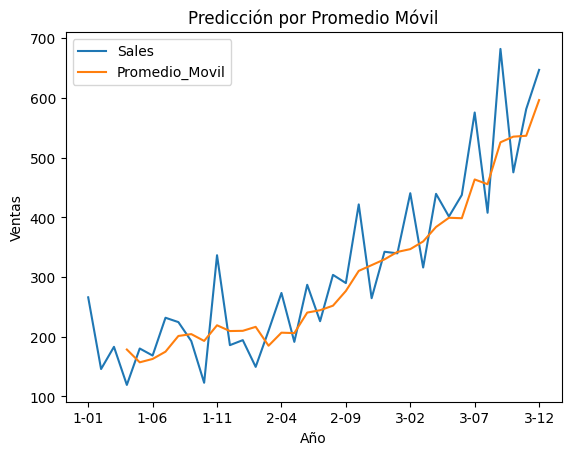

In [10]:
# Promedio Móvil

datos['Promedio_Movil'] = datos['Sales'].rolling(window = 4).mean()

# Graficar los datos y el Promedio Móvil

datos[['Sales', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

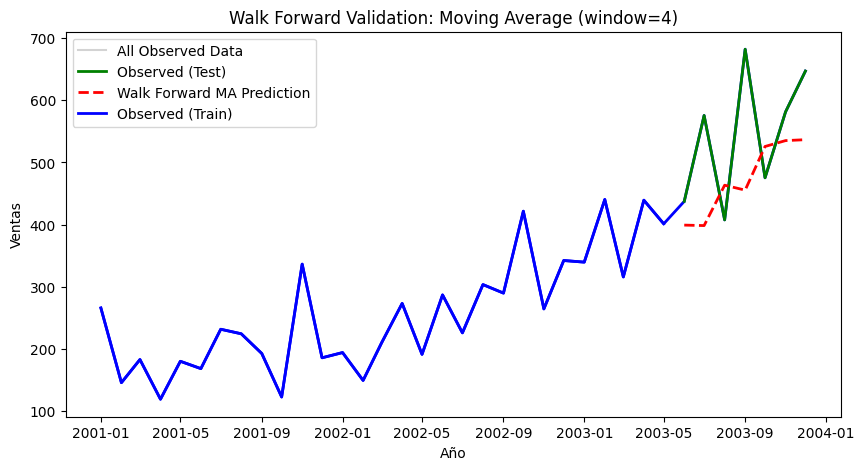

RMSE: 121.93


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare the data
data = [
    ("1-01",266.0), ("1-02",145.9), ("1-03",183.1), ("1-04",119.3), ("1-05",180.3), ("1-06",168.5),
    ("1-07",231.8), ("1-08",224.5), ("1-09",192.8), ("1-10",122.9), ("1-11",336.5), ("1-12",185.9),
    ("2-01",194.3), ("2-02",149.5), ("2-03",210.1), ("2-04",273.3), ("2-05",191.4), ("2-06",287.0),
    ("2-07",226.0), ("2-08",303.6), ("2-09",289.9), ("2-10",421.6), ("2-11",264.5), ("2-12",342.3),
    ("3-01",339.7), ("3-02",440.4), ("3-03",315.9), ("3-04",439.3), ("3-05",401.3), ("3-06",437.4),
    ("3-07",575.5), ("3-08",407.6), ("3-09",682.0), ("3-10",475.3), ("3-11",581.3), ("3-12",646.9)
]

df = pd.DataFrame(data, columns=['Month', 'Sales'])
df['Month'] = pd.date_range(start='2001-01', periods=len(df), freq='MS')
df.set_index('Month', inplace=True)

# Split: 29 for train, 7 for test
train_size = 29
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Walk forward validation with moving average (window=4)
window = 4
history = list(train['Sales'])
preds = []

for t in range(len(test)):
    if len(history) >= window:
        pred = np.mean(history[-window:])
    else:
        pred = np.mean(history)
    preds.append(pred)
    history.append(test['Sales'].iloc[t])

# Convert predictions to Series for plotting
preds_series = pd.Series(preds, index=test.index)

plt.figure(figsize=(10, 5))

# Plot the entire real data in light gray for context
plt.plot(df.index, df['Sales'], color='lightgray', label='All Observed Data', zorder=1)

# Plot the full observed data as a single line (for continuity)
plt.plot(df.index, df['Sales'], color='blue', linewidth=2, label='_nolegend_', zorder=2)

# Overlay the test segment in green, so it covers the blue in the test region
plt.plot(test.index, test['Sales'], color='green', linewidth=2, label='Observed (Test)', zorder=3)

# Plot predictions
plt.plot(preds_series.index, preds_series, color='red', linestyle='--', linewidth=2, label='Walk Forward MA Prediction', zorder=4)

# Add legend for train (blue) only for the train region
plt.plot(train.index, train['Sales'], color='blue', linewidth=2, label='Observed (Train)', zorder=2)

plt.legend()
plt.title("Walk Forward Validation: Moving Average (window=4)")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], preds))
print(f"RMSE: {rmse:.2f}")

### Alisamiento exponencial

### Holt winters

### SARIMA

### Prophet

## monthly-mean-temp.csv

### Análisis exploratorio

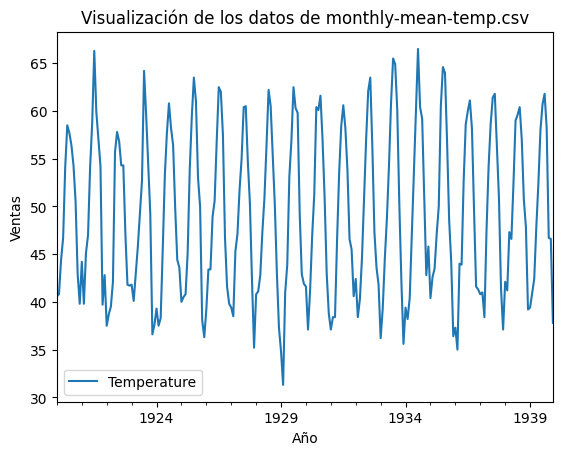

In [12]:
# Leer los datos
filename = 'monthly-mean-temp.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

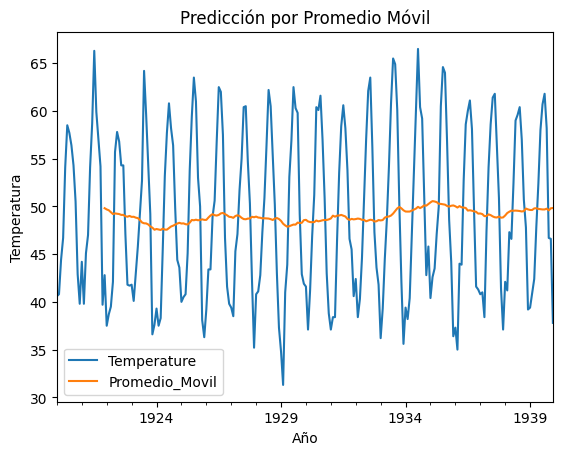

In [13]:
# Promedio Móvil

datos['Promedio_Movil'] = datos['Temperature'].rolling(window = 24).mean()

# Graficar los datos y el Promedio Móvil

datos[['Temperature', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.show()

### Alisamiento exponencial

### Holt winters

### SARIMA

### Prophet

### Comparacion y Evaluacion

## monthly-car-sales.csv

### Análisis exploratorio

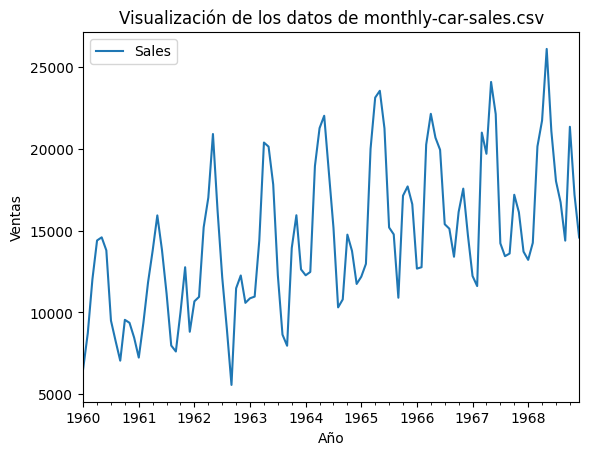

In [14]:
# Leer los datos
filename = 'monthly-car-sales.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

### Alisamiento exponencial

### Holt winters

### ARIMA

### Prophet

### Comparacion y Evaluacion

## daily-total-female-births.csv

### Análisis exploratorio

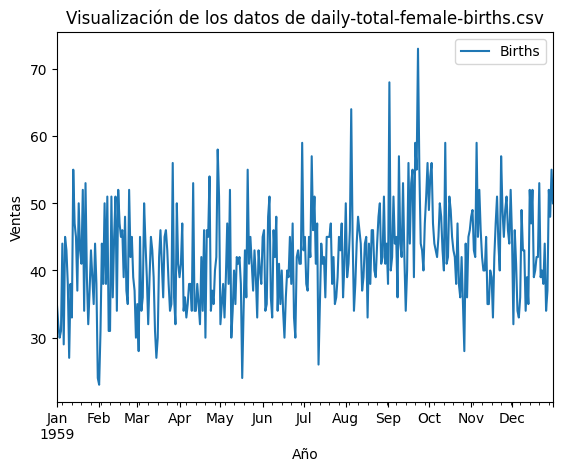

In [15]:
# Leer los datos
filename = 'daily-total-female-births.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Date',
                    parse_dates = True)

datos.index.freq = 'D'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

### Alisamiento exponencial

### Holt winter

### ARIMA

### Prophet

### Comparacion y Evaluacion